IMPORT LIBRARIES

In [1]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt


LOAD DATASET

In [2]:
dataSet = pds.read_csv(r"C:\Users\harsh\OneDrive\Desktop\Harshith\Python practice\Datasets\archive\yield_df.csv")
dataSet

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


CLEANING DATASET

In [3]:
#remove "Unnnamed" it does not have any significance
dataSet.pop("Unnamed: 0")


0            0
1            1
2            2
3            3
4            4
         ...  
28237    28237
28238    28238
28239    28239
28240    28240
28241    28241
Name: Unnamed: 0, Length: 28242, dtype: int64

In [4]:
#REMOVED UNNAMED COLUMN
print(dataSet.head())


      Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37  


EXPLORATORY DATA ANALYSIS

In [5]:
country_series =dataSet['Area'].value_counts() 
print(country_series)

Area
India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64


There are countries that have less than 150 rows  of data and others with over a 200+ rows, remove those other countries


In [6]:
drop_list = country_series[country_series < 150].index.tolist()
print("Countries having less than 150 entries: ")
print(drop_list) #countries less than 150 row count
print(len(drop_list))#number of countries with less than 150 rows

Countries having less than 150 entries: 
['Suriname', 'Romania', 'Libya', 'Portugal', 'Bulgaria', 'France', 'Hungary', 'Senegal', 'Ukraine', 'Tajikistan', 'Guyana', 'Azerbaijan', 'Nepal', 'Algeria', 'Croatia', 'Mauritius', 'Albania', 'Austria', 'Malaysia', 'Lesotho', 'New Zealand', 'Switzerland', 'Lebanon', 'Slovenia', 'Namibia', 'Eritrea', 'Poland', 'Netherlands', 'Tunisia', 'Qatar', 'Bahamas', 'Botswana', 'Belarus', 'Lithuania', 'Armenia', 'Denmark', 'Sweden', 'Norway', 'Finland', 'Ireland', 'Latvia', 'Estonia', 'Belgium', 'Bahrain', 'Sudan', 'Montenegro']
46


Filtered dataset

In [7]:
filtered_df = dataSet[~dataSet['Area'].isin(drop_list)]
print(dataSet["Area"].value_counts(), end= "\n\n")

print("Dataset after removing entries  with area row count less than 150: ")

print(filtered_df["Area"].value_counts())

Area
India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64

Dataset after removing entries  with area row count less than 150: 
Area
India                       4048
Brazil                      2277
Mexico                      1472
Pakistan                    1449
Japan                        966
Australia                    966
Indonesia                    828
South Africa                 644
Turkey                       625
Ecuador                      621
Canada                       552
Spain                        483
Colombia                     414
Dominican Republic           368
Argentina                    368
Egypt                        322
Italy                        322
Morocco                      322
Bangladesh                   294
Iraq                         276
Germany      

In [8]:
print(filtered_df)

           Area            Item  Year  hg/ha_yield  \
213      Angola         Cassava  1990        41177   
214      Angola           Maize  1990         2736   
215      Angola        Potatoes  1990        40000   
216      Angola     Rice, paddy  1990         9512   
217      Angola  Sweet potatoes  1990        89342   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
213                           1010.0              64.00     24.12  
214                           1010.0              64.00     24.12  
215                           1010.0              64.00     24.12  
216                           1010.0              64.00     24.12  
217        

Now copy the filtered dataframe into variable df

In [9]:
df = filtered_df.reset_index(drop=True)
#we reset indices because some rows are removed
print(df)

           Area            Item  Year  hg/ha_yield  \
0        Angola         Cassava  1990        41177   
1        Angola           Maize  1990         2736   
2        Angola        Potatoes  1990        40000   
3        Angola     Rice, paddy  1990         9512   
4        Angola  Sweet potatoes  1990        89342   
...         ...             ...   ...          ...   
24262  Zimbabwe     Rice, paddy  2013        22581   
24263  Zimbabwe         Sorghum  2013         3066   
24264  Zimbabwe        Soybeans  2013        13142   
24265  Zimbabwe  Sweet potatoes  2013        22222   
24266  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1010.0              64.00     24.12  
1                             1010.0              64.00     24.12  
2                             1010.0              64.00     24.12  
3                             1010.0              64.00     24.12  
4          

In [10]:
datacopy = df.copy() #Making a Copy

#Converting Categories to Numbers
from sklearn.preprocessing import LabelEncoder as Le

cat_columns = datacopy.select_dtypes(include=['object']).columns.tolist()

#Updating the DataFrame
for i in cat_columns:
    datacopy[i] = Le().fit_transform(datacopy[i])


MODEL TRAINING

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X, y = datacopy.drop(labels='hg/ha_yield', axis=1), datacopy['hg/ha_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1. Linear Legression

In [12]:
from sklearn.linear_model import LinearRegression


# Create an instance of LinearRegression
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(X_train, y_train)

# Predict output for test data
y_predict = lr_model.predict(X_test)

# Calculate accuracy in percentage
acc_linear_regression = lr_model.score(X_test, y_test)*100

# Calculate Mean Squared Error (MSE)
MSError = mean_squared_error(y_test, y_predict)

# Calculate R2 score
R2_score = r2_score(y_test, y_predict)

print("Accuracy:", acc_linear_regression)
print("Mean Squared Error:", MSError)
print("R2 score:", R2_score)


Accuracy: 7.717726969105221
Mean Squared Error: 6259666179.004309
R2 score: 0.07717726969105221


2. KNN model

In [13]:
from sklearn.neighbors import KNeighborsRegressor

# Create an instance of KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as per your choice

# Fit the model on training data
knn_model.fit(X_train, y_train)

# Predict output for test data
y_predict = knn_model.predict(X_test)

# Calculate accuracy in percentage
acc_knn = knn_model.score(X_test, y_test)*100

# Calculate Mean Squared Error (MSE)
MSError = mean_squared_error(y_test, y_predict)

# Calculate R2 score
R2_score = r2_score(y_test, y_predict)

print("Accuracy:", acc_knn)
print("Mean Squared Error:", MSError)
print("R2 score:", R2_score)


Accuracy: 31.210798041898123
Mean Squared Error: 4666090537.601621
R2 score: 0.31210798041898125


3. Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as per your choice

# Fit the model on training data
random_forest_model.fit(X_train, y_train)

# Predict output for test data
y_predict = random_forest_model.predict(X_test)

# Calculate accuracy in percentage
acc_random_forest = random_forest_model.score(X_test, y_test) * 100

# Calculate Mean Squared Error (MSE)
MSError = mean_squared_error(y_test, y_predict)

# Calculate R2 score
R2_score = r2_score(y_test, y_predict)

print("Accuracy:", acc_random_forest)
print("Mean Squared Error:", MSError)
print("R2 score:", R2_score)


Accuracy: 99.07811928676213
Mean Squared Error: 62532763.142922774
R2 score: 0.9907811928676213


4. Bagging Regressor

In [15]:
from sklearn.ensemble  import BaggingRegressor

# Create an instance of BaggingRegressor
bagging_regressor_model = BaggingRegressor(n_estimators=100, random_state=42)  

# Fit the model on training data
bagging_regressor_model.fit(X_train, y_train)

# Predict output for test data
y_predict = bagging_regressor_model.predict(X_test)

# Calculate accuracy in percentage
acc_BaggingRegressor = bagging_regressor_model.score(X_test, y_test) * 100

# Calculate Mean Squared Error (MSE)
MSError = mean_squared_error(y_test, y_predict)

# Calculate R2 score
R2_score = r2_score(y_test, y_predict)

print("Accuracy:", acc_BaggingRegressor)
print("Mean Squared Error:", MSError)
print("R2 score:", R2_score)


Accuracy: 99.07432910260333
Mean Squared Error: 62789857.88941931
R2 score: 0.9907432910260333


5. Logistic Regression

PLOTTING GRAPHS OF ACCURACY

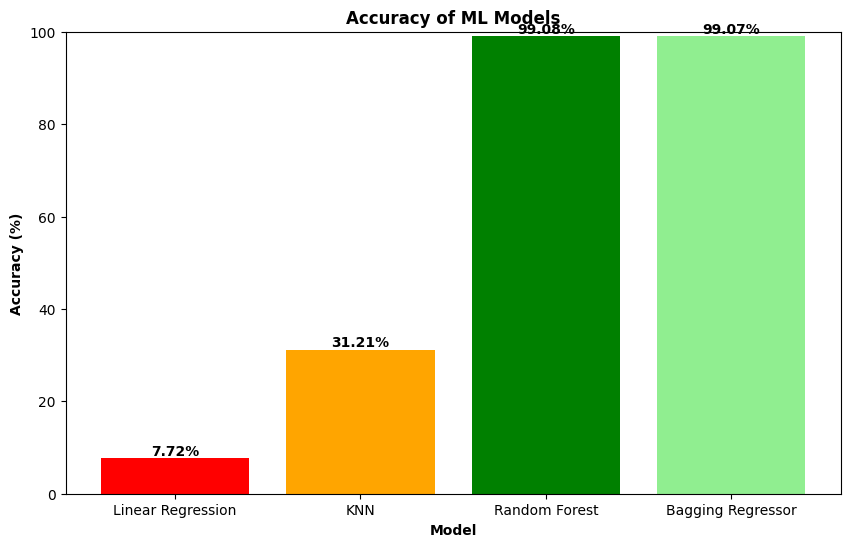

['random_forest_model.pkl']

In [16]:
import matplotlib.pyplot as plt

# List of model names and their accuracies
model_names = ['Linear Regression', 'KNN', 'Random Forest', 'Bagging Regressor']
accuracies = [acc_linear_regression, acc_knn, acc_random_forest, acc_BaggingRegressor]  

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['red', 'orange', 'green', 'lightgreen'])
plt.title('Accuracy of ML Models', fontweight = 'bold')
plt.xlabel('Model', fontweight = 'bold')
plt.ylabel('Accuracy (%)', fontweight = 'bold')
plt.ylim(0, 100)

# Adding text labels for accuracy on top of each bar with bold font
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}%', 
             ha='center', va='bottom', weight='bold')  # Set weight to 'bold'

plt.show()

import joblib
joblib.dump(random_forest_model, 'random_forest_model.pkl')


Random forest regressor has the highest accuracy of all other models with an accuracy of 99.08% 
Hence we use RANDOM FOREST regressor for our Prediction

PREDICTION

1. Using Bagging regressor model

In [17]:
random_data = {
    'Area': [10],
    'Item': [3],
    'Year': [2022],
    'average_rain_fall_mm_per_year': [800],
    'pesticides_tonnes': [50],
    'avg_temp': [25]
}
random_df = pds.DataFrame(random_data)
predictions = bagging_regressor_model.predict(random_df)

print("Predicted yield:", round(predictions[0],2), "hg/ha_yield")


Predicted yield: 61927.79 hg/ha_yield


2. Random forest model

In [18]:
random_data = {
    'Area': [11],
    'Item': [3],
    'Year': [2022],
    'average_rain_fall_mm_per_year': [800],
    'pesticides_tonnes': [50],
    'avg_temp': [25]
}
random_df = pds.DataFrame(random_data)
predictions = random_forest_model.predict(random_df)

print("Predicted yield:", round(predictions[0],2), "hg/ha_yield")


Predicted yield: 69046.31 hg/ha_yield


In [19]:
import pickle

# Assuming your trained model object is named 'model'
# Replace 'model' with your actual trained model object
# Train your model here or load it from a saved file
# model = random_forest_model


# pickle.dump(model, open('random_forest_model.pkl', 'wb'))

ROUGH